<h1>Iteration 1 : Plot T-SNE</h1>

In [47]:
import csv
import numpy as np
import pandas as pd
import sys
sys.path.append("../") 

import os
from module.data_processing.read_data import *
from module.data_processing.data_processing import load_data
import json

ROOT_DIR = '/home/aonishchuk/'
DATA_DIR = os.path.join(ROOT_DIR, 'data')
IMAGES_DIR = os.path.join(ROOT_DIR, 'images')

illu_file = os.path.join(DATA_DIR, 'illu_rawnorm.csv')
genes_file = os.path.join(DATA_DIR, 'illu_genes.pkl')
landmarks_file = os.path.join(DATA_DIR, 'landmarks.txt')
kkochetov_model_params_file = os.path.join(DATA_DIR, 'archs.json')
best_genes_file = os.path.join(DATA_DIR, 'illu_dfs.pkl')

<h3>Read data</h3>

In [2]:
data, best_genes = load_data(1000, None)

<h3>T-SNE</h3>

In [2]:
from sklearn.manifold import TSNE

def calculate_tsne(data):
    tsne_results = TSNE(n_components=2).fit_transform(data)
    return tsne_results

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_tsne_seaborn(tsne, target_column, title=None):
    df_subset = pd.DataFrame()
    df_subset['tsne-2d-one'] = tsne[:, 0]
    df_subset['tsne-2d-two'] = tsne[:, 1]

    plt.figure(figsize=(16, 10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue=target_column,
        palette=sns.color_palette("hls", target_column.nunique()),
        data=df_subset,
        legend="full",
        alpha=0.3
    )
    
    plt.title(title)
    
    if title is not None:
        image_name = os.path.join(IMAGES_DIR, '{}.png'.format(title))
        plt.savefig(image_name)

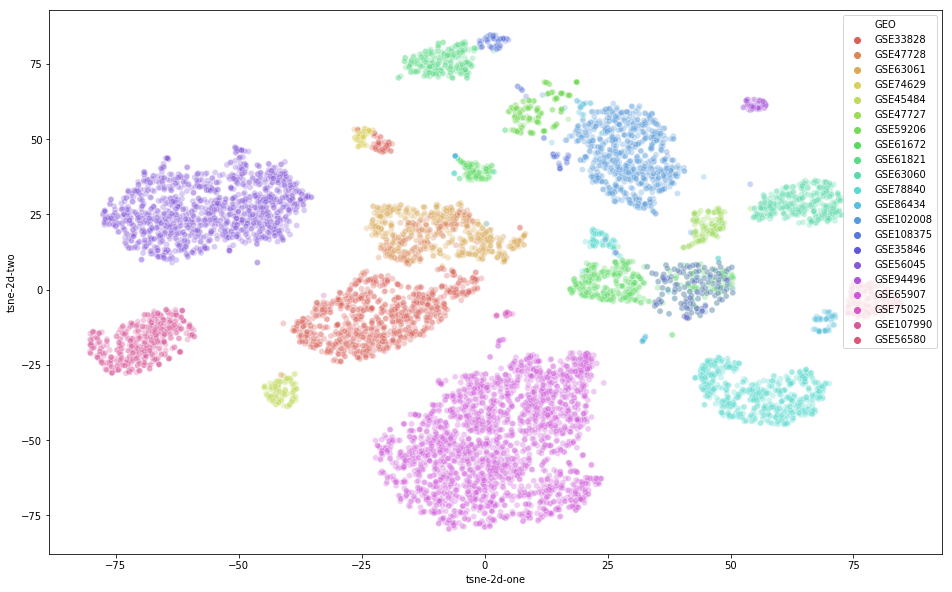

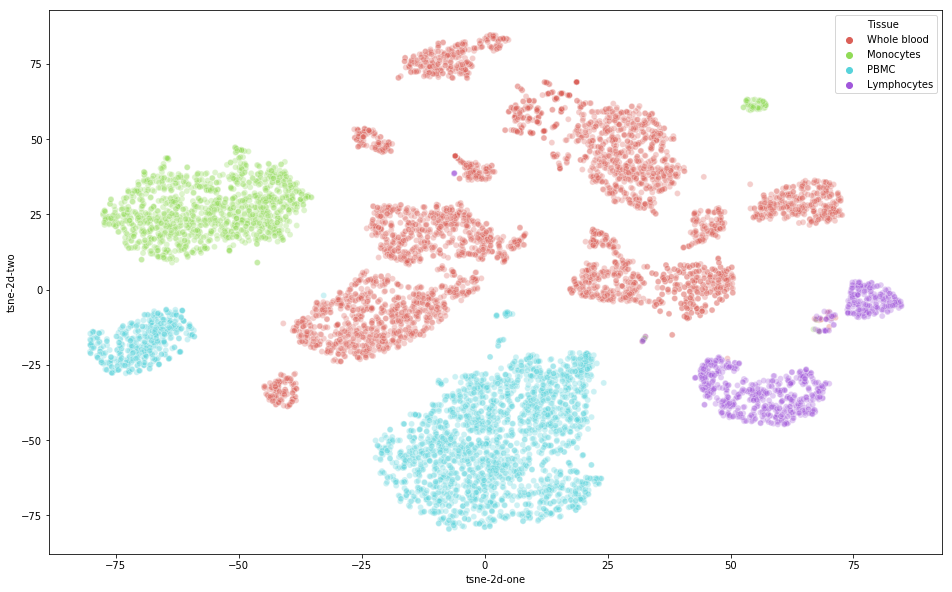

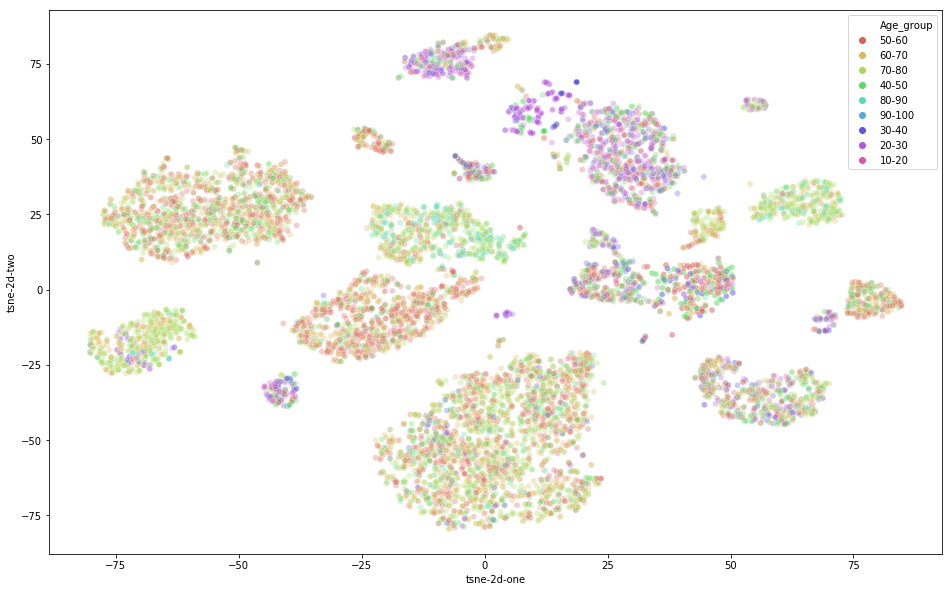

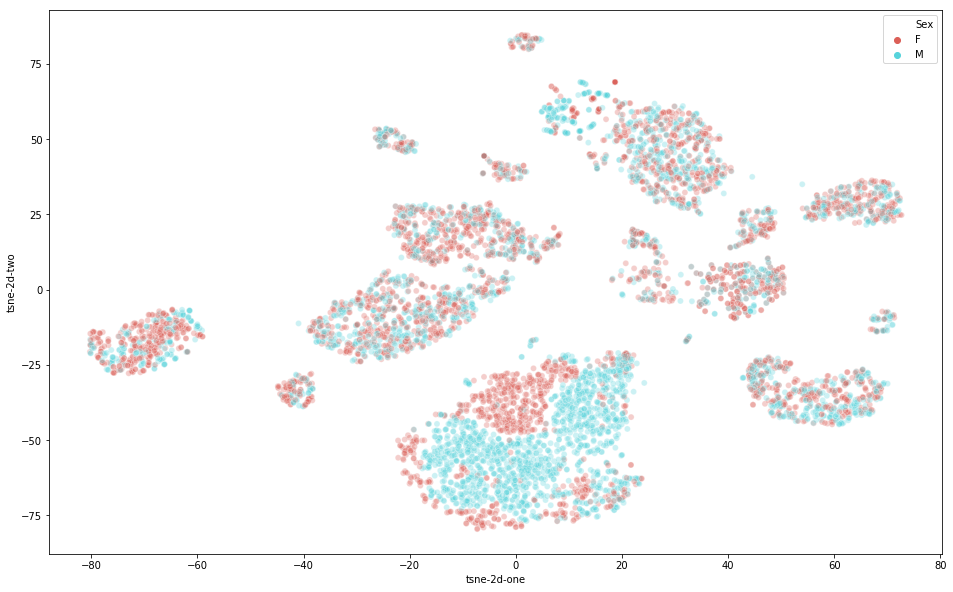

In [17]:
target_columns = ['GEO', 'Tissue', 'Age_group', 'Sex']
for column in target_columns:
    plot_tsne_seaborn(tsne, data[column], 'tsne_{}'.format(column.lower()))

In [52]:
from module.data_processing.data_generating_cases import processing_conveyor

processing_sequence = {
    'load_data': dict(
        features_count=1000,
        rows_count=None,
    ),
    'filter_data': dict(
        filtered_column='Tissue',
        using_values='Whole blood',
    ),
    'apply_logarithm': dict(
        shift=3,
    ),
    'normalization': dict(
        method='series',
    ),
}

data_holder = processing_conveyor(processing_sequence)

/home/aonishchuk/anaconda3/envs/mstrHW/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


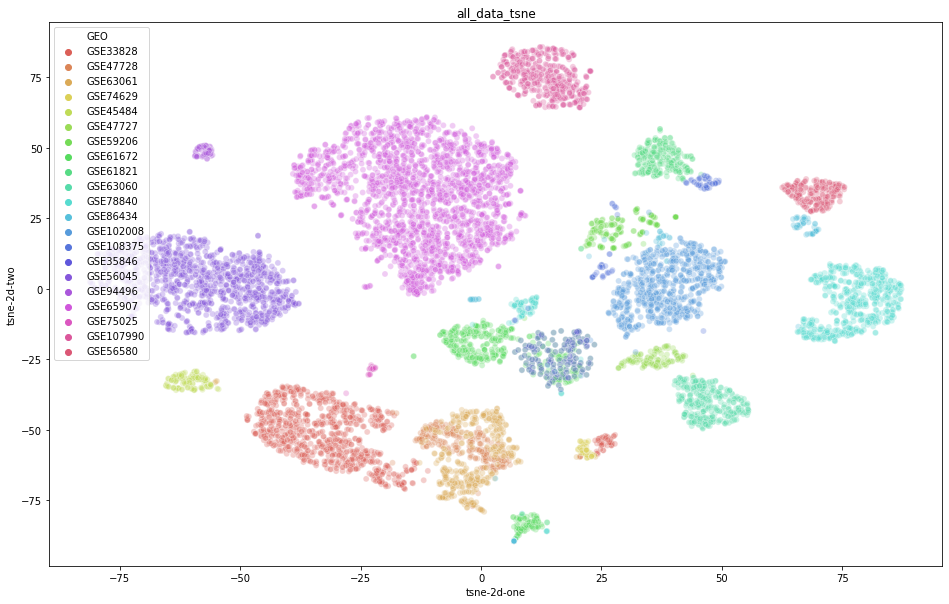

In [53]:
data_holder.processing_sequence = {
    'load_data': dict(
        features_count=1000,
        rows_count=None,
    ),
}

data_holder.processed_data = data_holder.parse_sequence()
tsne = calculate_tsne(data_holder.processed_data[data_holder.best_genes])
plot_tsne_seaborn(tsne, data_holder.processed_data['GEO'], 'all_data_tsne')

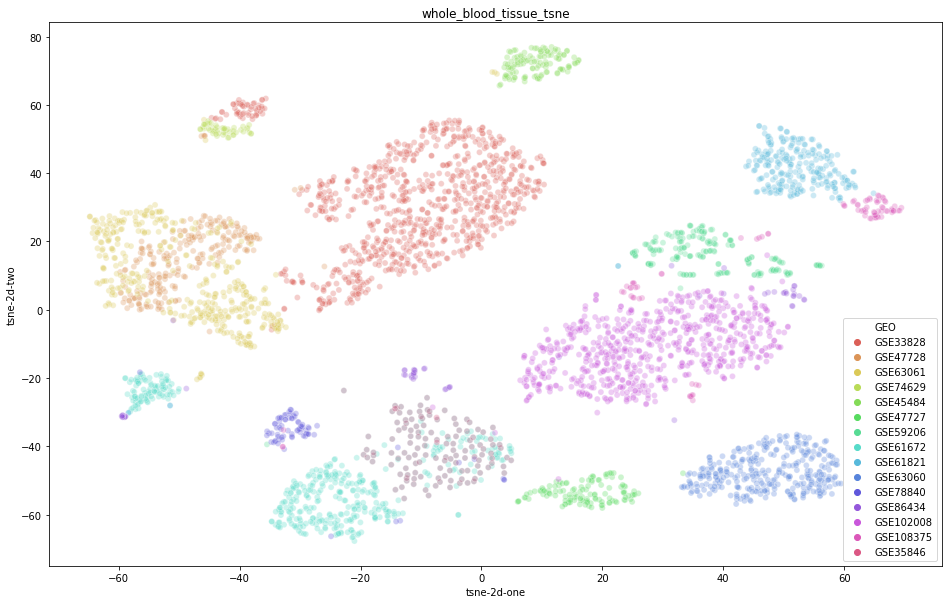

In [78]:
data_holder.processing_sequence = {
    'load_data': dict(
        features_count=1000,
        rows_count=None,
    ),
    'filter_data': dict(
        filtered_column='Tissue',
        using_values='Whole blood',
    ),
}

data_holder.processed_data = data_holder.parse_sequence()
tsne = calculate_tsne(data_holder.processed_data[data_holder.best_genes])
plot_tsne_seaborn(tsne, data_holder.processed_data['GEO'], 'whole_blood_tissue_tsne')

In [79]:
def plot_distributions(df, best_genes, title):
    n_x = 4
    n_y = 3
    fig, ax = plt.subplots(n_x, n_y, sharex='col', sharey='row', figsize=(16, 9))
    for i, gene in enumerate(best_genes):
        curr_df = df[gene]
        curr_df = curr_df.astype(float)
        
        row = int(i / n_y)
        column = int(i % n_y)
        
        curr_df.plot.hist(bins=20, ax=ax[row, column])
    
    fig.suptitle(title)
    
    if title is not None:
        image_name = os.path.join(IMAGES_DIR, '{}.png'.format(title))
        plt.savefig(image_name)

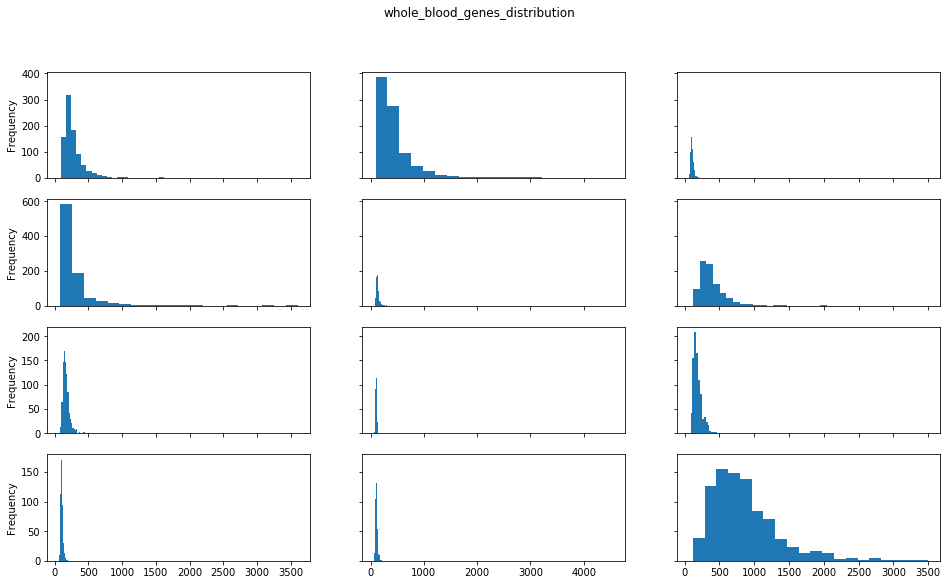

In [80]:
ref_batch_name = data_holder.processed_data['GEO'].value_counts().keys()[0]
ref_batch_mask = data_holder.processed_data['GEO'] == ref_batch_name

plot_distributions(data_holder.processed_data[ref_batch_mask], data_holder.best_genes[:12], 'whole_blood_genes_distribution')

/home/aonishchuk/anaconda3/envs/mstrHW/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


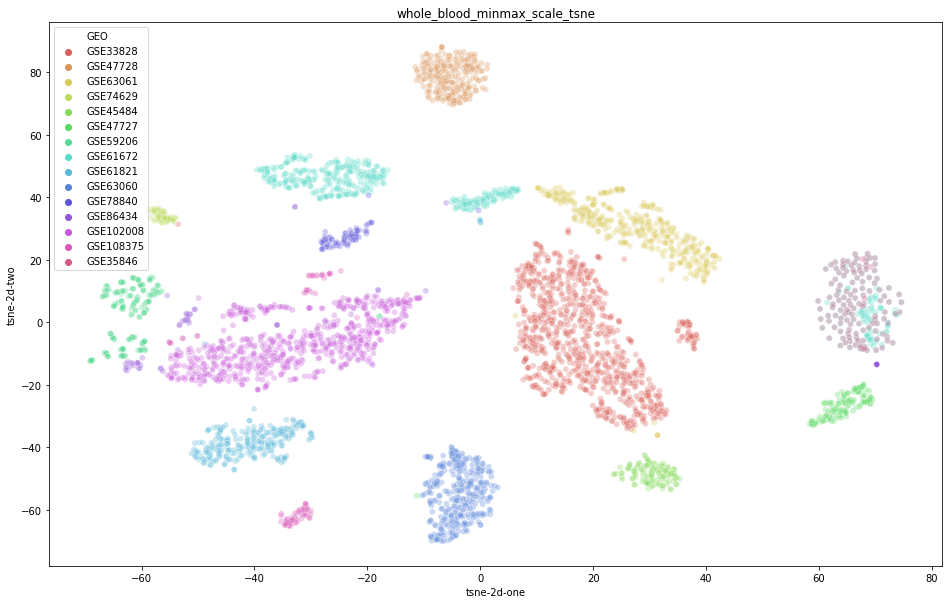

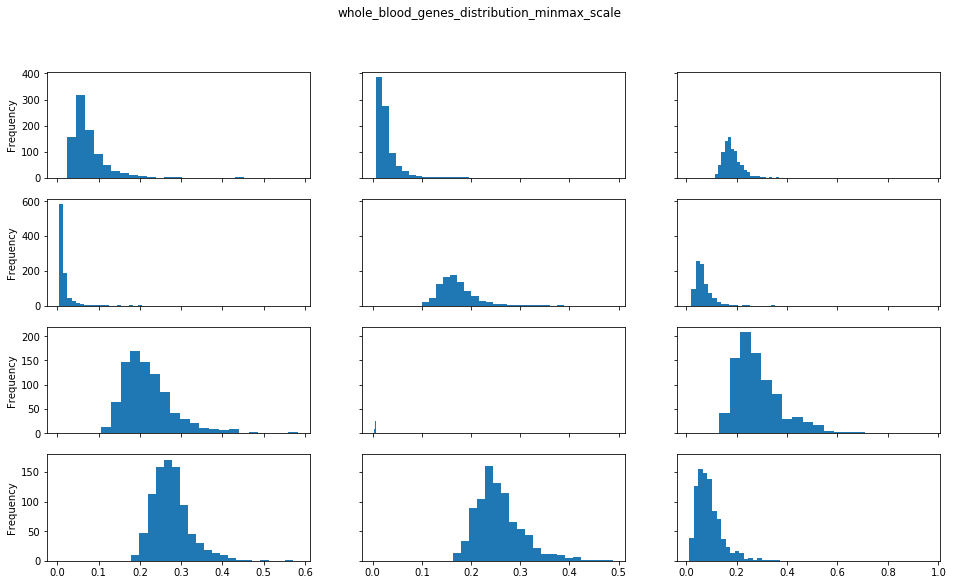

In [83]:
data_holder.processing_sequence = {
    'load_data': dict(
        features_count=1000,
        rows_count=None,
    ),
    'filter_data': dict(
        filtered_column='Tissue',
        using_values='Whole blood',
    ),
    'normalization': dict(
        method='default',
    ),
}

data_holder.processed_data = data_holder.parse_sequence()
tsne = calculate_tsne(data_holder.processed_data[data_holder.best_genes])
plot_tsne_seaborn(tsne, data_holder.processed_data['GEO'], 'whole_blood_minmax_scale_tsne')

ref_batch_name = data_holder.processed_data['GEO'].value_counts().keys()[0]
ref_batch_mask = data_holder.processed_data['GEO'] == ref_batch_name

plot_distributions(data_holder.processed_data[ref_batch_mask], data_holder.best_genes[:12], 'whole_blood_genes_distribution_minmax_scale')

/home/aonishchuk/anaconda3/envs/mstrHW/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


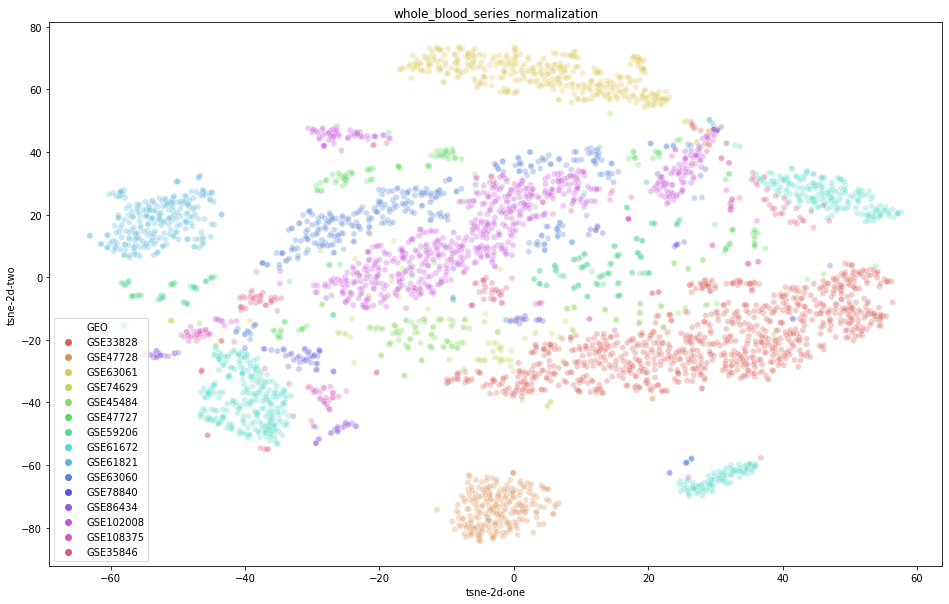

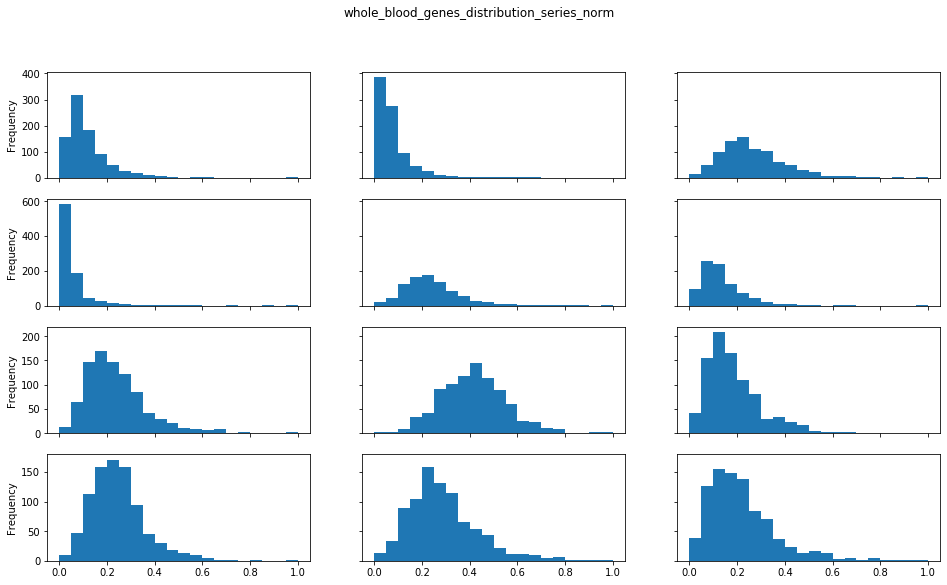

In [84]:
data_holder.processing_sequence = {
    'load_data': dict(
        features_count=1000,
        rows_count=None,
    ),
    'filter_data': dict(
        filtered_column='Tissue',
        using_values='Whole blood',
    ),
    'normalization': dict(
        method='series',
    ),
}

data_holder.processed_data = data_holder.parse_sequence()
tsne = calculate_tsne(data_holder.processed_data[data_holder.best_genes])
plot_tsne_seaborn(tsne, data_holder.processed_data['GEO'], 'whole_blood_series_normalization')

plot_distributions(data_holder.processed_data[ref_batch_mask], data_holder.best_genes[:12], 'whole_blood_genes_distribution_series_norm')

/home/aonishchuk/anaconda3/envs/mstrHW/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/aonishchuk/anaconda3/envs/mstrHW/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


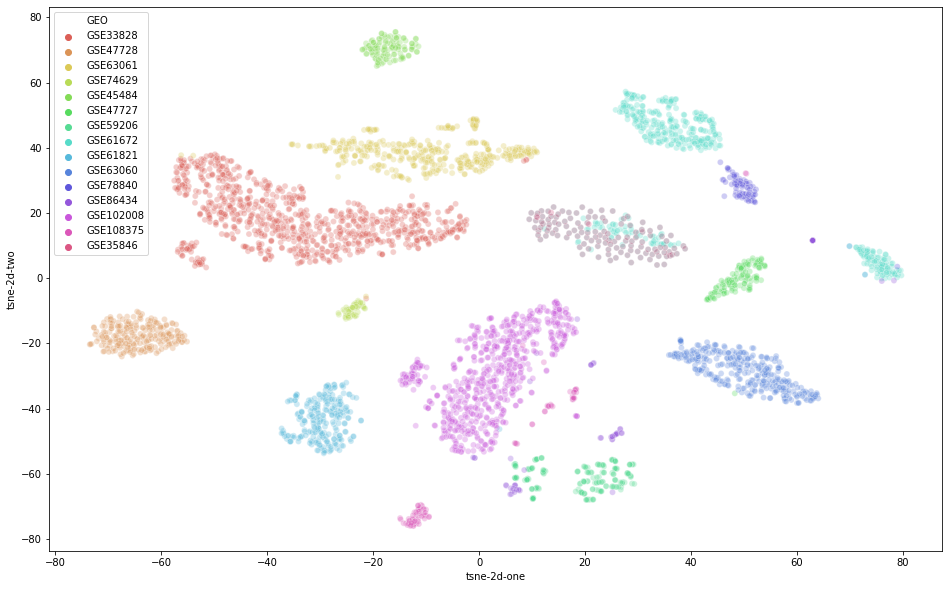

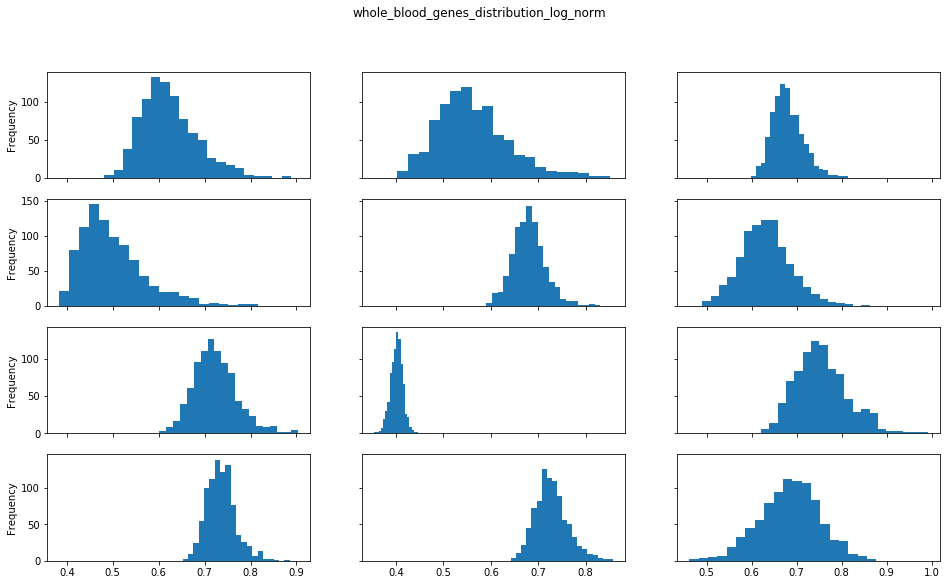

In [85]:
data_holder.processing_sequence = {
    'load_data': dict(
        features_count=1000,
        rows_count=None,
    ),
    'filter_data': dict(
        filtered_column='Tissue',
        using_values='Whole blood',
    ),
    'apply_logarithm': dict(
        shift=3,
    ),
    'normalization': dict(
        method='default',
    ),
}

data_holder.processed_data = data_holder.parse_sequence()
tsne = calculate_tsne(data_holder.processed_data[data_holder.best_genes])
plot_tsne_seaborn(tsne, data_holder.processed_data['GEO'])

plot_distributions(data_holder.processed_data[ref_batch_mask], data_holder.best_genes[:12], 'whole_blood_genes_distribution_log_norm')

/home/aonishchuk/anaconda3/envs/mstrHW/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


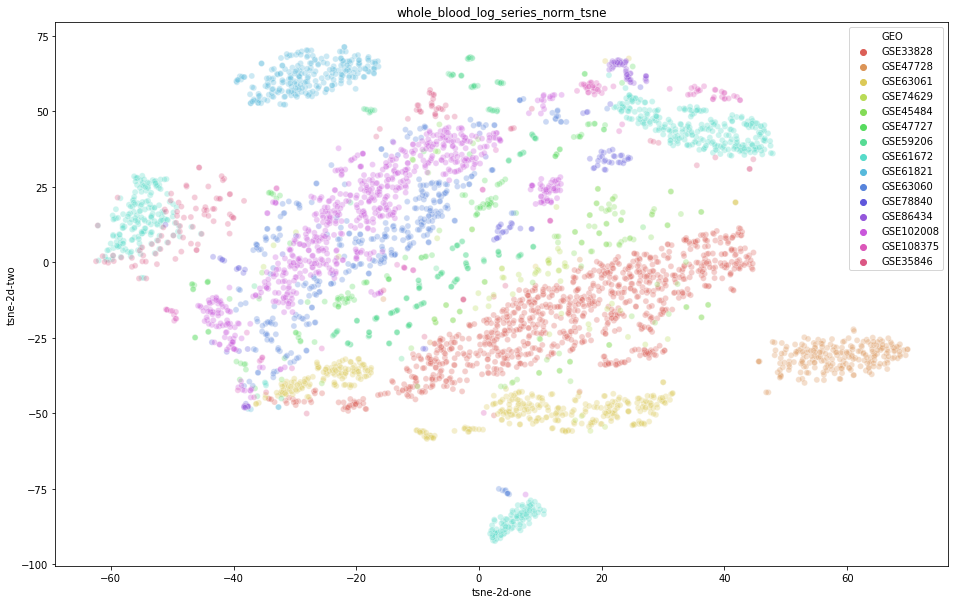

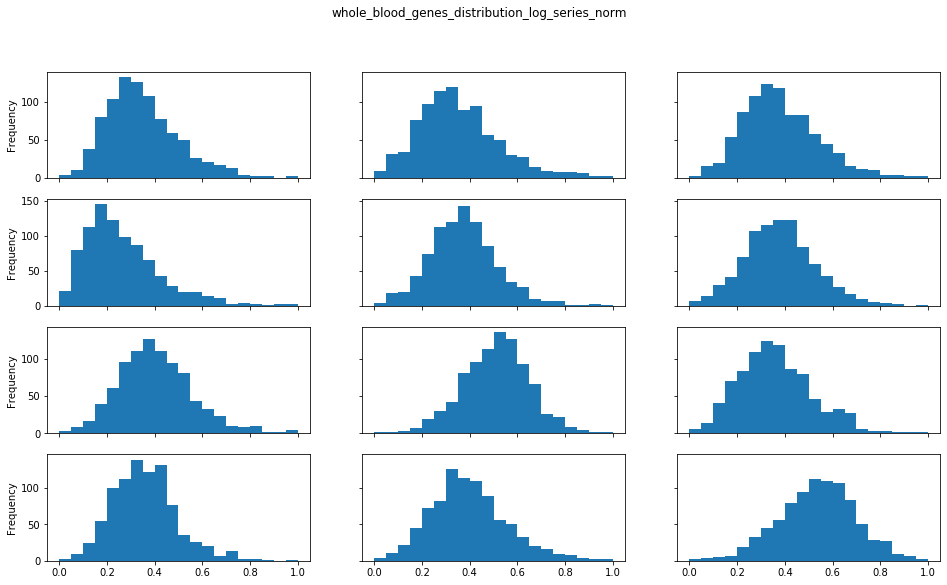

In [91]:
data_holder.processing_sequence = {
    'load_data': dict(
        features_count=1000,
        rows_count=None,
    ),
    'filter_data': dict(
        filtered_column='Tissue',
        using_values='Whole blood',
    ),
    'apply_logarithm': dict(
        shift=3,
    ),
    'normalization': dict(
        method='series',
    ),
}

data_holder.processed_data = data_holder.parse_sequence()
tsne = calculate_tsne(data_holder.processed_data[data_holder.best_genes])
plot_tsne_seaborn(tsne, data_holder.processed_data['GEO'], 'whole_blood_log_series_norm_tsne')

plot_distributions(data_holder.processed_data[ref_batch_mask], data_holder.best_genes[:12], 'whole_blood_genes_distribution_log_series_norm')

In [92]:
from module.data_processing.data_processing import add_gaussian_noise, get_batches
from module.data_processing.data_generating_cases import processing_conveyor


processing_sequence = {
    'load_data': dict(
        features_count=1000,
        rows_count=None,
    ),
    'filter_data': dict(
        filtered_column='Tissue',
        using_values='Whole blood',
    ),
    'normalization': dict(
        method='series',
    ),
}

data_holder = processing_conveyor(processing_sequence)

# data_holder.processed_data = data_holder.parse_sequence()

/home/aonishchuk/anaconda3/envs/mstrHW/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [93]:
from tqdm import tqdm_notebook

generated_data = []
for batch in tqdm_notebook(get_batches(data_holder.processed_data, 128)):
    generated_batch = batch.copy()
    
    _genes_part = generated_batch[data_holder.best_genes].values
    _genes_part = add_gaussian_noise(_genes_part, 0.5)
    
    generated_batch[data_holder.best_genes] = _genes_part
    generated_data.append(generated_batch)
generated_data = pd.concat(generated_data, ignore_index=True)

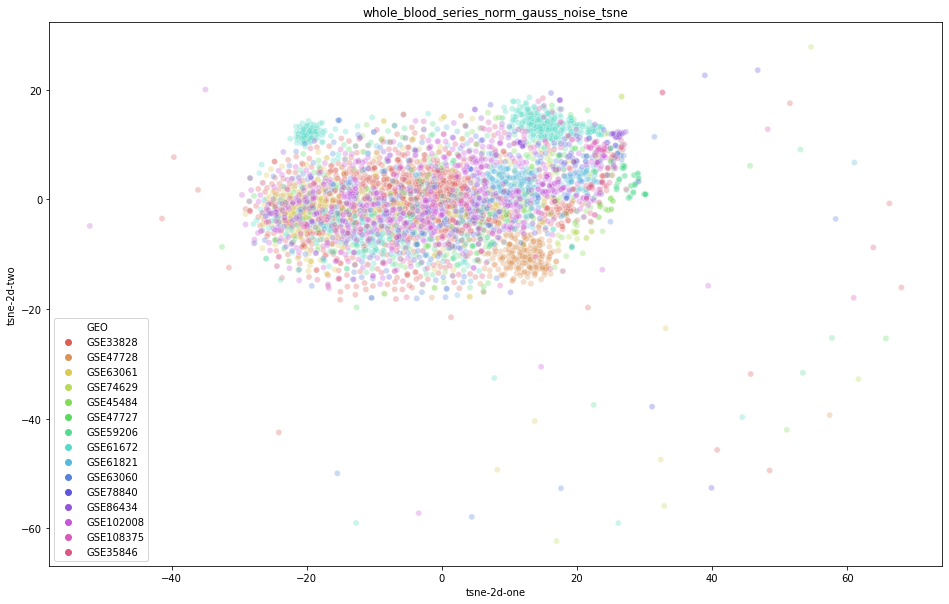

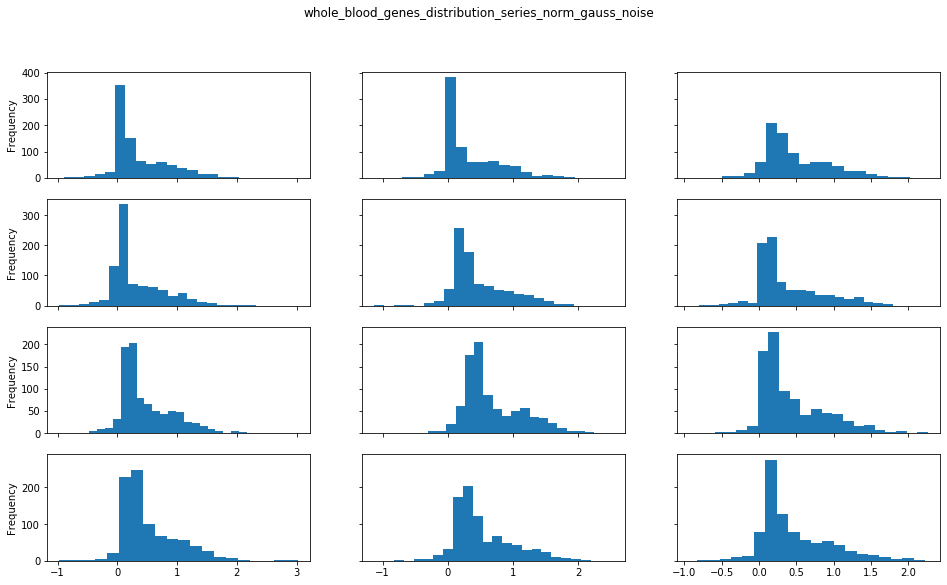

In [94]:
tsne = calculate_tsne(generated_data[data_holder.best_genes])
plot_tsne_seaborn(tsne, generated_data['GEO'], 'whole_blood_series_norm_gauss_noise_tsne')

plot_distributions(generated_data[generated_data['GEO'] == ref_batch_name], data_holder.best_genes[:12], 'whole_blood_genes_distribution_series_norm_gauss_noise')

In [99]:
from module.data_processing.data_processing import add_gaussian_noise, get_batches
from module.data_processing.data_generator import DistanceNoiseGenerator


noise_probability = 1.0
batch_size = 128

data_holder.processing_sequence = {
    'load_data': dict(
        features_count=1000,
        rows_count=None,
    ),
    'filter_data': dict(
        filtered_column='Tissue',
        using_values='Whole blood',
    ),
    'normalization': dict(
        method='series',
    ),
}

data_holder.processed_data = data_holder.parse_sequence()

ref_batch_name = data_holder.processed_data['GEO'].value_counts().keys()[0]
ref_mask = data_holder.processed_data['GEO'] == ref_batch_name
ref_data = data_holder.processed_data[ref_mask]
corrupt_data = data_holder.processed_data[~ref_mask]

noised_batches_generator = DistanceNoiseGenerator(
    ref_data,
    corrupt_data,
    data_holder.best_genes,
    'test',
    noise_probability,
)

/home/aonishchuk/anaconda3/envs/mstrHW/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
14it [00:06,  1.62it/s]


In [100]:
generated_data = []
for batch in tqdm_notebook(get_batches(data_holder.processed_data, batch_size)):
    generated_batch = batch.copy()
    
    _genes_part = generated_batch[data_holder.best_genes].values
    _genes_part = noised_batches_generator.data_generation(_genes_part)
    
    generated_batch[data_holder.best_genes] = _genes_part
    generated_data.append(generated_batch)
generated_data = pd.concat(generated_data, ignore_index=True)

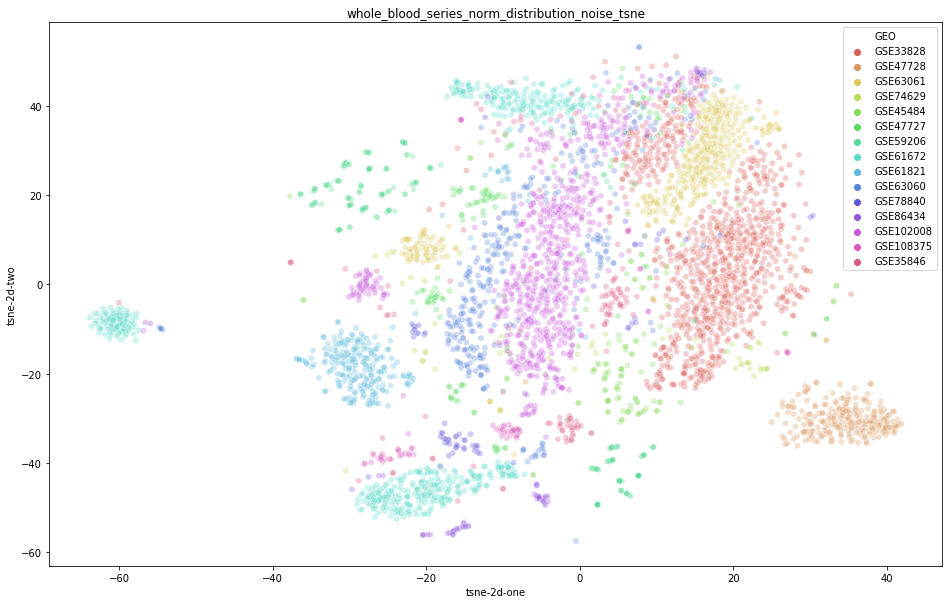

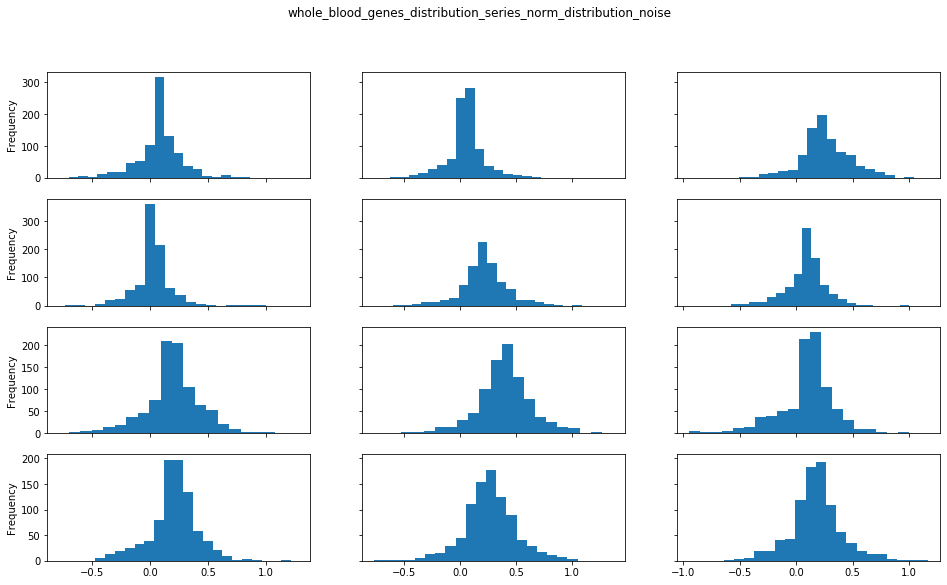

In [101]:
tsne = calculate_tsne(generated_data[data_holder.best_genes])
plot_tsne_seaborn(tsne, generated_data['GEO'], 'whole_blood_series_norm_distribution_noise_tsne')

plot_distributions(generated_data[generated_data['GEO'] == ref_batch_name], data_holder.best_genes[:12], 'whole_blood_genes_distribution_series_norm_distribution_noise')

In [ ]:


# generated_data = pd.DataFrame(np.zeros(shape=(1, data_holder.processed_data.shape[1])), columns=data_holder.processed_data.columns)
# for batch in get_batches(corrupt_data, batch_size):
#     generated_batch = batch
#     generated_batch.loc[:, data_holder.best_genes] = noised_batches_generator.data_generation(batch[data_holder.best_genes].values)
#     #     generated_data = np.concatenate((generated_data, generated_batch), axis=0)
#     generated_data = pd.concat([generated_data, generated_batch], ignore_index=True)
# generated_data = generated_data.iloc[1:]

In [105]:
noise_probability = 1.
batch_size = 128

processing_sequence = {
    'load_data': dict(
        features_count=1000,
        rows_count=None,
    ),
    'filter_data': dict(
        filtered_column='Tissue',
        using_values='Whole blood',
    ),
    'apply_logarithm': dict(
        shift=3,
    ),
    'normalization': dict(
        method='series',
    ),
}

data_holder = processing_conveyor(processing_sequence)

# data_holder.processed_data = data_holder.parse_sequence()

ref_batch_name = data_holder.processed_data['GEO'].value_counts().keys()[0]
ref_mask = data_holder.processed_data['GEO'] == ref_batch_name
ref_data = data_holder.processed_data[ref_mask]
corrupt_data = data_holder.processed_data[~ref_mask]

noised_batches_generator = DistanceNoiseGenerator(
    ref_data,
    corrupt_data,
    data_holder.best_genes,
    'test',
    noise_probability,
)

/home/aonishchuk/anaconda3/envs/mstrHW/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/aonishchuk/anaconda3/envs/mstrHW/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
14it [00:07,  1.77it/s]


In [106]:
generated_data = []
for batch in tqdm_notebook(get_batches(corrupt_data, batch_size)):
    generated_batch = batch.copy()
    
    _genes_part = generated_batch[data_holder.best_genes].values
    _genes_part = noised_batches_generator.data_generation(_genes_part)
    
    generated_batch[data_holder.best_genes] = _genes_part
    generated_data.append(generated_batch)
generated_data = pd.concat(generated_data, ignore_index=True)

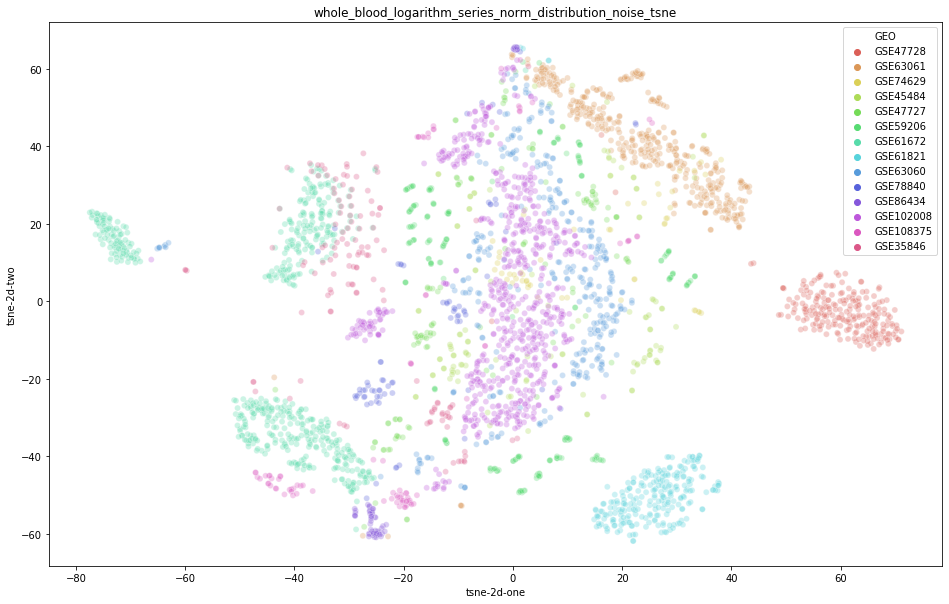

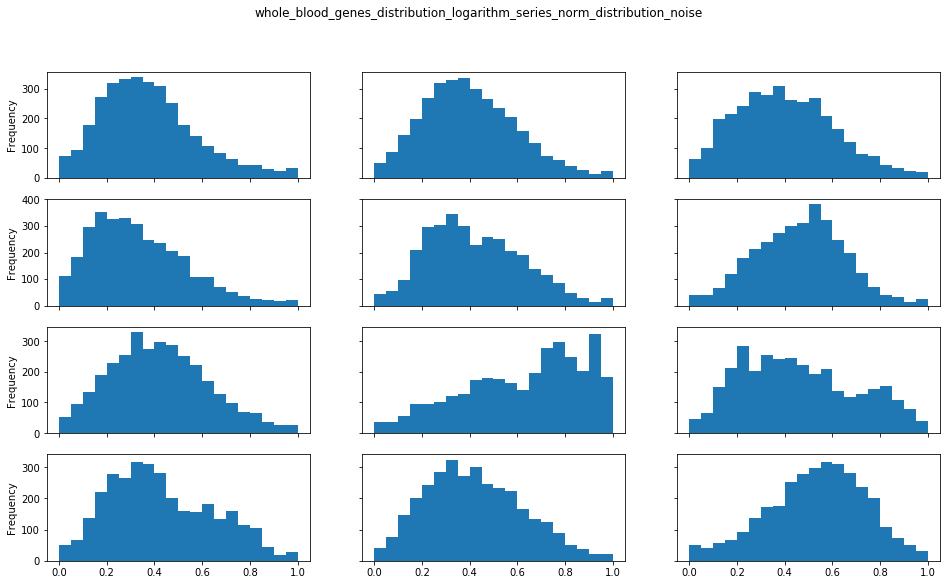

In [107]:
tsne = calculate_tsne(generated_data[data_holder.best_genes])
plot_tsne_seaborn(tsne, generated_data['GEO'], 'whole_blood_logarithm_series_norm_distribution_noise_tsne')

plot_distributions(generated_data[generated_data['GEO'] != ref_batch_name], data_holder.best_genes[:12], 'whole_blood_genes_distribution_logarithm_series_norm_distribution_noise')